In [19]:
# Imports
import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy

%matplotlib inline
plt.style.use('bmh')

In [20]:
#below all subdirectories are searched for data files

all_files = []
file_end = 'segments.csv'
def read(root):
    for (dir_path, dir_names, files) in os.walk(root):
        for file in files:
             if file.lower().endswith(file_end.lower()):
                paths= re.split(r"[/\\]", dir_path.lower())
                print(paths)
                df = pd.read_csv(os.path.join(dir_path, file),
                                 )#names=["bwd_path0","bwd_path1","srtt_path0","srtt_path1","loss_path0","loss_path1"]
                #print(file)
                df['trace'] = int(file.split("_")[0])
                df['model'] = paths[-2].split("_")[-2] + paths[-2].split("_")[-3]
                #based on subdirectory, is the download a video or a file
                #df['download_type'] = paths[2]
    #
                ##based on subdirectory, what type of mobility are the traces
                #df['trace_mobility'] = paths[3]
    #
                #df['TraceID'] = len(all_files) #each file is a separate trace
                all_files.append(df)
old_lstm = "central_service/runs/20230528_02_22_05_LSTM_test/"
new_lstm = "central_service/runs/20240523_15_03_47_LSTM_train/"
min_rtt = 'central_service/runs/20230529_11_01_43_minrtt_test/'
a2c = "central_service/runs/20230530_00_45_43_a2c_test/"
falcon = "central_service/runs/20240518_11_56_10_FALCON_test/"

runs = [old_lstm,new_lstm,min_rtt,a2c,falcon]
if len(runs) >= 1:
    for r in runs:
        read(r)
    df_runs = pd.concat(all_files, ignore_index=True)
    #df_runs
else:
    df_runs = all_files

['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20230528_02_22_05_lstm_test', '']
['central_service', 'runs', '20240523_15_03_47_lstm_train', '']
['central_service', 'runs', '20240523_15_03_47_lstm_train', '']
['central_service', 'runs', '20240523_15_03_47_lstm_train', '']
['central_service', 'runs', '20240523_15_03_47_lstm_train', '']
['central_service', 'runs', '20240523_15_03_47_lstm_train', '']
['central_service', 'runs', '20240523_15_03_47_lst

In [21]:
df_runs

,Unnamed: 0,segment_nr,bandwidth,bitrate,down_shifts,buffering_ratio,initial_buffering,stall_count,stall_sum,qoe,trace,model
0,0,0,2254.147030,247444,0,0.000000,0.540411,0,0.000000,0.239470,0,lstm05
1,1,1,371804.276746,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm05
2,2,2,462561.467599,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm05
3,3,3,357435.653359,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm05
4,4,4,517216.745330,494206,0,0.000000,0.000000,0,0.000000,0.220483,0,lstm05
...,...,...,...,...,...,...,...,...,...,...,...,...
13065,271,271,528957.702922,2971199,0,0.012817,0.000000,4,6.917533,0.000000,9,falcon10
13066,272,272,652399.916549,2971199,0,0.012783,0.000000,4,6.917533,0.000000,9,falcon10
13067,273,273,399696.460927,2971199,0,0.012731,0.000000,4,6.917533,0.000000,9,falcon10
13068,274,274,490865.470927,2971199,0,0.012690,0.000000,4,6.917533,0.000000,9,falcon10


In [22]:
traces = pd.read_csv("central_service/test_traces.csv")
traces['mobility'] = (traces['Trace1'] == 'wifi') | (traces['Trace2'] == 'wifi')
traces['mobility'] = traces['mobility'].apply(lambda x: 'static' if x else 'mobile')
traces = traces.rename(columns={traces.columns[0]: 'trace'}, errors="raise")
# traces = traces[['trace', 'mobility']]
traces

,trace,Trace1,Trace2,mobility
0,0,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
1,1,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
2,2,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
3,3,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
4,4,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
5,5,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static
6,6,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
7,7,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
8,8,/home/mininet/Workspace/mpquic-sbd/network/min...,/home/mininet/Workspace/mpquic-sbd/network/min...,mobile
9,9,/home/mininet/Workspace/mpquic-sbd/network/min...,wifi,static


In [23]:
df_runs = df_runs.merge(traces, on='trace')
trace_qoe = df_runs.groupby(['trace', 'model']).agg({'qoe':'last'}).reset_index().rename(columns={'qoe':'trace_qoe'}, errors="raise")
df_runs = df_runs.merge(trace_qoe, on=['trace', 'model'])
# df_runs=df_runs[df_runs['trace']=='static']

In [24]:
df_runs['model'] = df_runs['model'].replace('lstm05', 'old lstm')
df_runs['model'] = df_runs['model'].replace('lstm47', 'improved lstm')
df_runs['model'] = df_runs['model'].replace('minrtt43', 'minrtt')
df_runs['model'] = df_runs['model'].replace('a2c43', 'a2c')
df_runs['model'] = df_runs['model'].replace('falcon10', 'falcon')

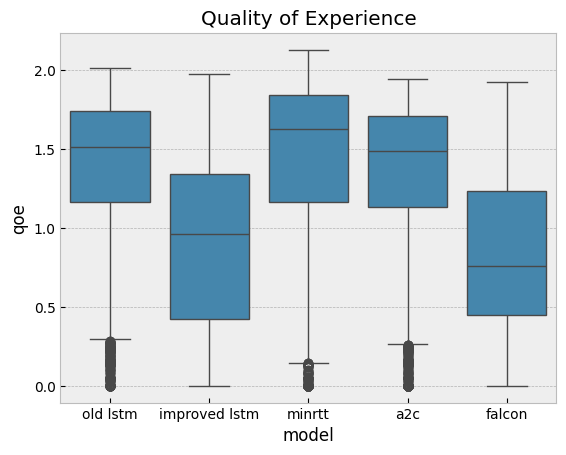

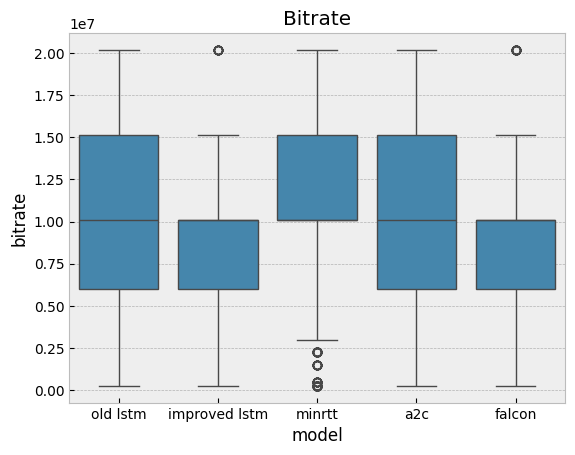

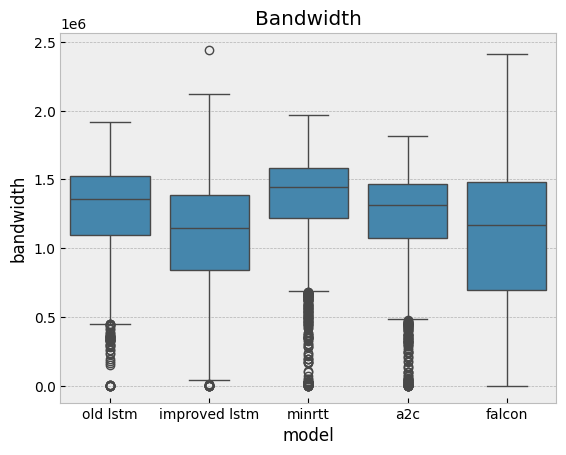

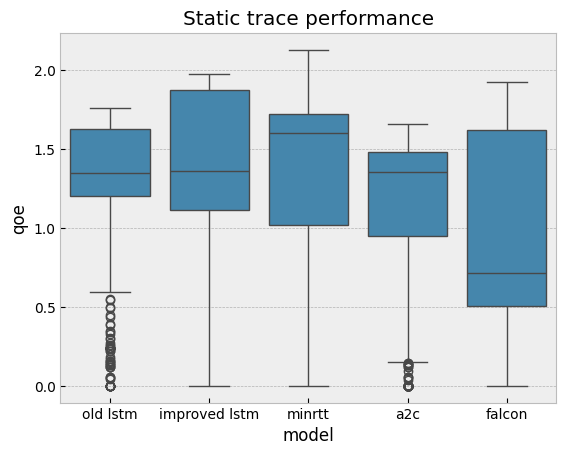

<Axes: xlabel='segment_nr'>

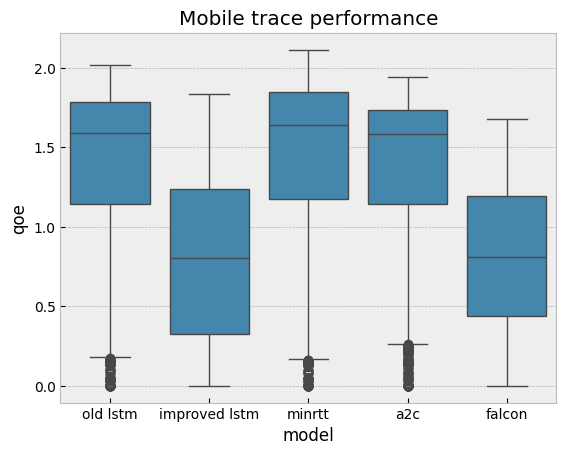

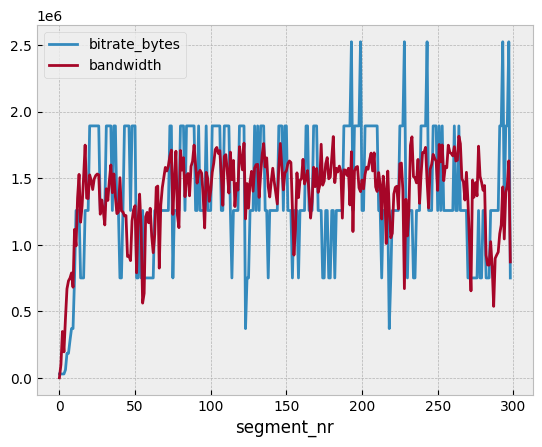

In [25]:
#df_runs = df_runs[df_runs['trace']<4]

#df_runs.groupby(['trace', 'model']).agg({'qoe':'last', 'bitrate':'mean'})
#df_runs.groupby(['model']).agg({'bandwidth':'mean'})
#df_runs.groupby(['model']).agg({'trace_qoe':'mean'})
#df_runs.groupby(['model']).plot(x='model', y='trace_qoe', kind='box')
#plt.boxplot(x=df_runs['model'], y='trace_qoe')
sns.boxplot(data=df_runs, x='model', y='qoe', orient='v')
plt.title('Quality of Experience')
plt.show()
sns.boxplot(data=df_runs, x='model', y='bitrate', orient='v')
plt.title('Bitrate')
plt.show()
sns.boxplot(data=df_runs, x='model', y='bandwidth', orient='v')
plt.title('Bandwidth')
plt.show()
sns.boxplot(data=df_runs[df_runs['mobility']=='static'], x='model', y='qoe')
plt.title('Static trace performance')
plt.show()
sns.boxplot(data=df_runs[df_runs['mobility']=='mobile'], x='model', y='qoe')
plt.title('Mobile trace performance')

df_runs['bitrate_bytes'] = df_runs['bitrate']/8
df_runs[(df_runs['model']=='minrtt') & (df_runs['trace']==2)].plot(x='segment_nr', y=['bitrate_bytes', 'bandwidth']) #, kind='scatter'
#df_runs.groupby(['trace', 'model']).agg({'bwd_path0':'mean'})

In [26]:
df_runs.groupby(['trace', 'model']).agg({'qoe':'last', 'bitrate':'mean'})

qoe       bitrate
trace model                                
0     a2c            1.374429  9.419088e+06
      falcon         0.951673  7.832683e+06
      improved lstm  0.115104  8.806036e+06
      minrtt         1.567405  1.018425e+07
      old lstm       1.528543  9.882111e+06
1     a2c            1.871609  1.075272e+07
      falcon         1.626525  9.792008e+06
      improved lstm  1.304052  7.866015e+06
      minrtt         2.046571  1.128299e+07
      old lstm       1.923877  1.091229e+07
2     a2c            1.749212  1.028211e+07
      falcon         1.680755  9.974020e+06
      improved lstm  1.351104  8.763181e+06
      minrtt         1.952247  1.096744e+07
      old lstm       1.868932  1.070288e+07
3     a2c            1.730828  1.039990e+07
      falcon         1.265272  9.532334e+06
      improved lstm  0.509494  9.007473e+06
      minrtt         1.939510  1.104988e+07
      old lstm       1.818363  1.061768e+07
4     a2c            1.715812  1.011926e+07
      falcon         1.163768  8.438682e+06
      improved lstm  1.039419  7.561997e+06
      minrtt         1.818789  1.047282e+07
      old lstm       1.658821  1.016365e+07
5     a2c            1.370997  8.700071e+06
      falcon         1.917484  1.103469e+07
      improved lstm  1.353573  9.036320e+06
      minrtt         1.653400  9.982842e+06
      old lstm       1.369790  8.809809e+06
6     a2c            1.621783  1.022623e+07
      falcon         0.801580  1.001209e+07
      improved lstm  1.301351  8.776001e+06
      minrtt         1.752299  1.085302e+07
      old lstm       1.807678  1.080836e+07
7     a2c            1.853916  1.028414e+07
      falcon         1.499012  8.914980e+06
      improved lstm  1.020379  7.221806e+06
      minrtt         1.858116  1.055247e+07
      old lstm       1.830924  1.033173e+07
8     a2c            1.733164  1.031617e+07
      falcon         1.329274  8.839791e+06
      minrtt         1.854451  1.078422e+07
      old lstm       1.797075  1.037335e+07
9     a2c            0.000000  8.435408e+06
      falcon         0.000000  4.050050e+06
      improved lstm  1.863605  1.052565e+07
      minrtt         0.000000  1.022362e+07
      old lstm       1.633240  9.639505e+06

In [27]:
df_runs[(df_runs['model']=='lstm') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].plot()
plt.show()
df_runs[(df_runs['model']=='minrtt') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].iloc[100:].plot()

KeyError: "None of [Index(['bwd_path0', 'bwd_path1'], dtype='object')] are in the [columns]"

In [ ]:



falcon = "central_service/runs/20240515_21_52_35_FALCON_train/"
read(falcon)

['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
